## Détection de faux billets.

 l’ONCFM met en place des méthodes d’identification des faux billets en euros pour lutter contre la contrefaçon.
Dans ce but une application de machine learning devras être mis à disposition.

L'objectif est de pouvoir identifier des vrais et faux billets en comparant leur dimentions.

### Sommaire<a id='100'></a>

* [ I   : Modules](#01) 
* [ II  : Lecture et Analyse du fichier fournis.](#02) 
* [ III : Combler les valeurs manquante.](#03) 
* [ IV  : ACP et clustering](#04) 
* [ V   : Algorithme de détection](#05) 

### I   : Modules<a id='01'></a>
[retourner au sommaire](#100)

In [118]:
import pandas as pd #module de manipulation de données
import numpy as np #module de calcul numérique

import matplotlib.pyplot as plt  #module de visualisation
import seaborn as sns  #module de visualisation
import plotly.express as px #module de visualisation

from sklearn.linear_model import LinearRegression  #module de régression linéaire
from sklearn.model_selection import train_test_split  #module de séparation des données
from sklearn.ensemble import RandomForestClassifier  #module de classification
from sklearn.metrics import accuracy_score  #module d'évaluation de la performance
from sklearn import preprocessing    #module de prétraitement
from sklearn.decomposition import PCA  #module d'analyse en composantes principales
from sklearn.linear_model import LinearRegression  #module de régression linéaire
from sklearn.preprocessing import StandardScaler   #module de normalisation
from sklearn.cluster import KMeans  #module de clustering
from sklearn.metrics import r2_score #module d'évaluation de la performance

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### II  : Lecture et Analyse du fichier fournis<a id='02'></a>
[retourner au sommaire](#100)

In [119]:
df=pd.read_csv('billets.csv',delimiter=';') #importation du fichier csv
df.head() #affichage des 5 premières lignes

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [120]:
df.info() #pour voir les types de données

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


On remarque déjà que 37 données sont manquante dans la colonne margin_low


In [121]:
df.dtypes #type de chaque colonne

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

is_guenuine est un booléen contenant True et False.

In [122]:
df.describe() #pour voir les statistiques descriptives

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


Il ne semble pas y avoir de valeurs aberrante

In [123]:
df['is_genuine'].value_counts() #pour voir le nombre de valeurs uniques

is_genuine
True     1000
False     500
Name: count, dtype: int64

In [124]:
# Détecter les doublons
doublons = df.duplicated()

# Afficher les lignes dupliquées
df[doublons]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length


pas de doublons

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

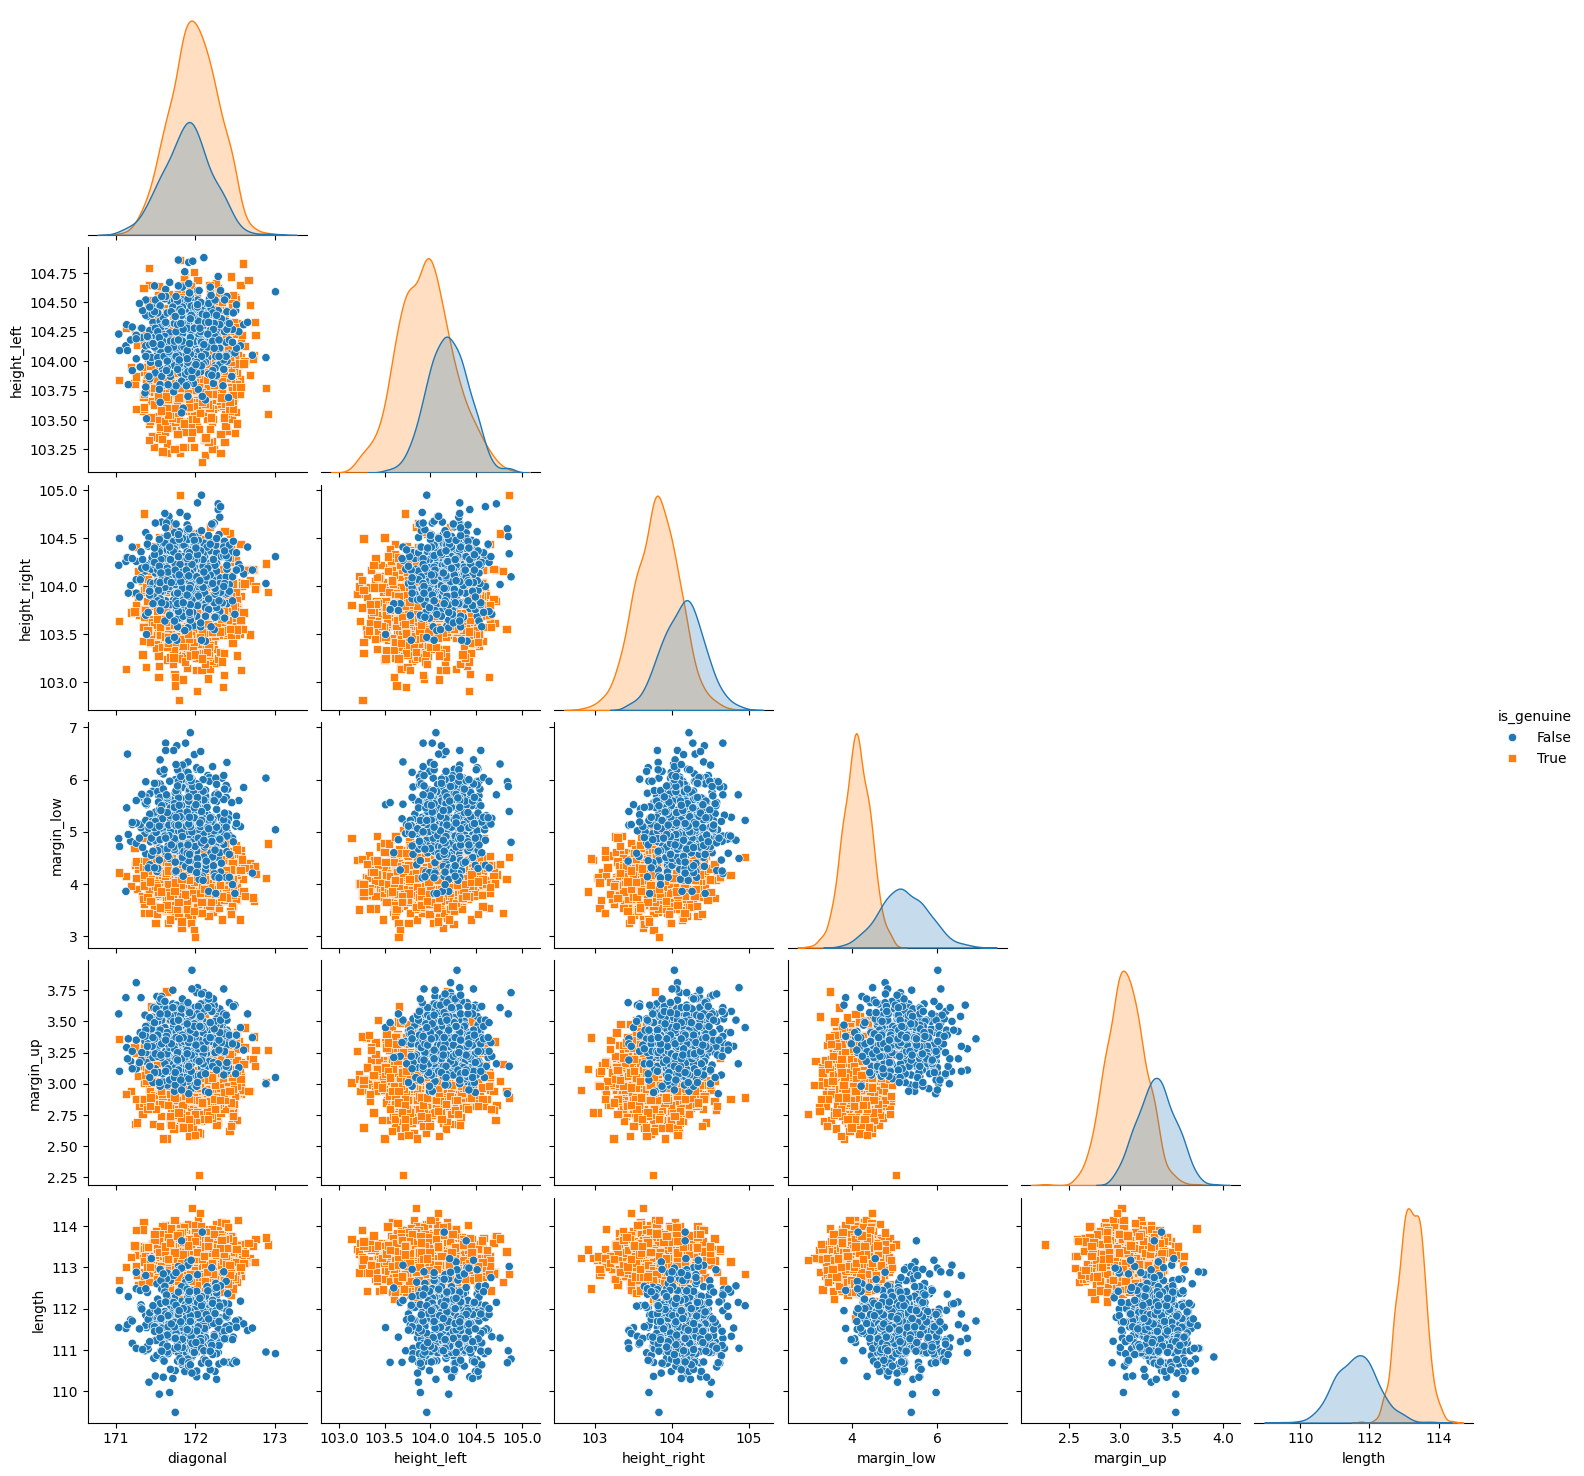

In [125]:
sns.pairplot(df, hue='is_genuine', markers=['o', 's'], corner=True) #affichage des relations entre les variables
plt.show()

Les différences les plus flagrantes entre les vrais et faux billets dans l'échantillion fournis sont : la longueur et la marge basse

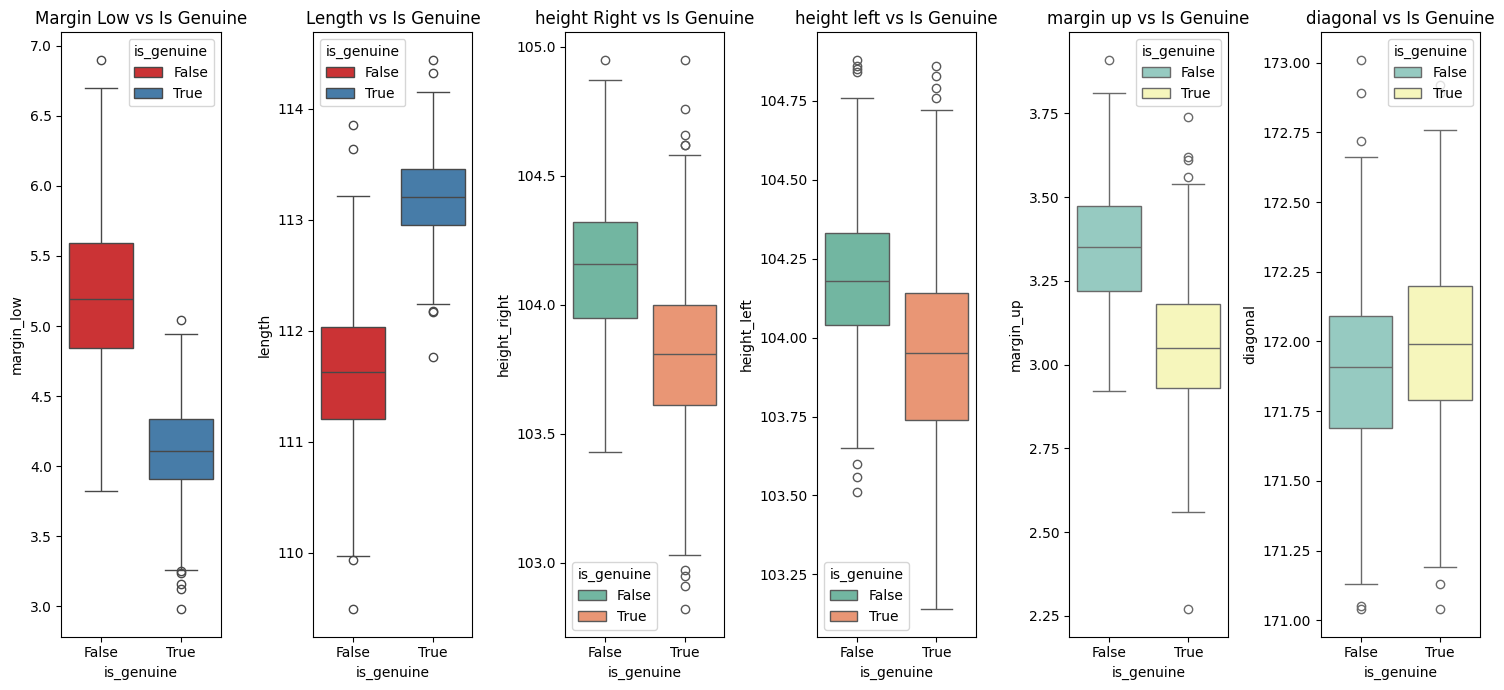

In [126]:
plt.figure(figsize=(15,7))

#  margin_low vs is_genuine
plt.subplot(1, 6, 1)
sns.boxplot(x='is_genuine', y='margin_low', data=df, palette='Set1', hue='is_genuine')
plt.title('Margin Low vs Is Genuine')

#  length vs is_genuine
plt.subplot(1, 6, 2)
sns.boxplot(x='is_genuine', y='length', data=df, palette='Set1', hue='is_genuine')
plt.title('Length vs Is Genuine')

#  height_right vs is_genuine
plt.subplot(1, 6, 3)
sns.boxplot(x='is_genuine', y='height_right', data=df, palette='Set2', hue='is_genuine')
plt.title('height Right vs Is Genuine')

#  height_left vs is_genuine
plt.subplot(1, 6, 4)
sns.boxplot(x='is_genuine', y='height_left', data=df, palette='Set2', hue='is_genuine')
plt.title('height left vs Is Genuine')

plt.subplot(1, 6, 5)
sns.boxplot(x='is_genuine', y='margin_up', data=df, palette='Set3', hue='is_genuine')
plt.title('margin up vs Is Genuine')

plt.subplot(1, 6, 6)
sns.boxplot(x='is_genuine', y='diagonal', data=df, palette='Set3', hue='is_genuine')
plt.title('diagonal vs Is Genuine')

plt.tight_layout()
plt.show()

ces différences sont confirmés ici.

In [127]:
matrix=df.corr() #matrice de corrélation
matrix

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.783032,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


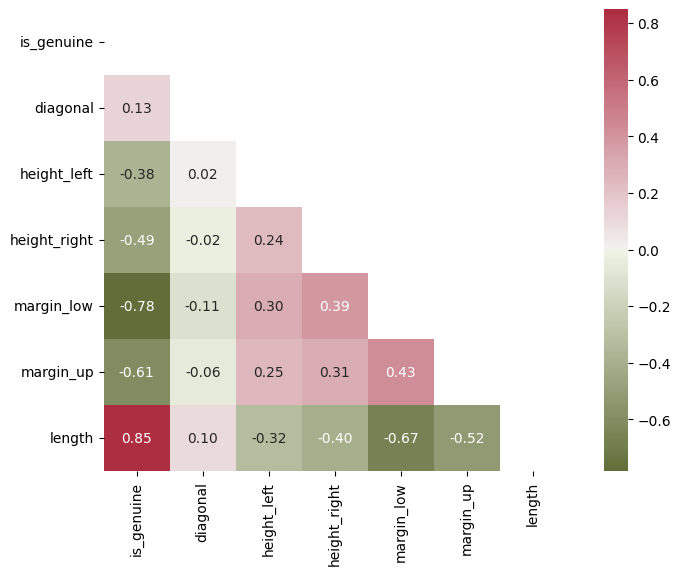

In [128]:
mask = np.triu(np.ones_like(matrix, dtype=bool)) #masque pour la partie supérieure du triangle

cmap = sns.diverging_palette(100, 7, s=75, l=40, #création d'une palette de couleurs
                            n=5, center="light", as_cmap=True) 

plt.figure(figsize=(10, 6)) 
sns.heatmap(matrix, mask=mask, center=0, annot=True, #affichage de la matrice de corrélation
            fmt='.2f', square=True, cmap=cmap) #affichage des valeurs

plt.show()

La matrice des corrélations résume les dépendances entre variables :
- 0 : absence de corrélation
- 1 : corrélation positive
- -1 : corrélation négative

Elle confirme ce qui à été cité précédement. 

La véracité du billet est corrélée à la longueurpositivement, et négativement à la marge basse. 
Mis à part les diagonales, les variables sont toutes plus ou moins dépendantes des autres.

In [129]:
# colonnes à standardiser
columns_to_standardize = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']


scaler = StandardScaler() 

# standardisation des colonnes

Xdf=df.copy()
Xdf[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

Xdf.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,-0.486540,2.774123,3.163240,0.051286,-1.128325,0.173651
1,True,-1.633729,-2.236535,-0.799668,-1.078937,-0.696799,0.471666
2,True,2.397823,1.504756,-1.291191,-0.129549,-0.912562,0.551901
3,True,-1.961498,-0.399294,0.060498,-1.304982,-0.610494,0.953075
4,True,-0.748754,0.836669,-1.414072,-0.672057,1.417677,-0.158750


enfin on standardise les données afin d'avoir toute les charactéristiques à la même échelle. Celas permet de pouvoir utiliser algorithmes de machine learning dans de meilleur conditions.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### III : Combler les valeurs manquante<a id='03'></a>
[retourner au sommaire](#100)

In [130]:
Xdf.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

Comme remarqué précédement, il manque 37 valeurs dans une des colonnes.

In [131]:
# Montrer les lignes contenant des valeurs manquante.
Xdf[Xdf.isna().any(axis=1)]

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,-0.060441,-0.466103,-1.444792,NaN,0.425168,0.127803
99,True,-0.093217,0.135176,0.797784,NaN,-0.049510,0.460204
151,True,0.365659,-0.766742,1.412188,NaN,-0.567341,0.288272
197,True,-1.666506,-1.234404,-0.369585,NaN,2.021814,0.677984
241,True,-0.420986,0.369007,0.429141,NaN,-0.567341,-0.365069
251,True,-0.519316,-2.570579,-3.380166,NaN,-0.869409,0.620674
284,True,-0.125994,-0.666529,-0.492466,NaN,0.338863,0.700909
334,True,-0.355432,-1.100786,0.121939,NaN,-0.653647,0.781144
410,True,1.971724,-1.033977,-1.260471,NaN,-0.135816,0.311197
413,True,1.119526,-1.234404,-1.291191,NaN,0.036795,0.311197


In [132]:
# afficher les indexes contenant des valeurs manquantes
missing_indexes = Xdf[Xdf.isna().any(axis=1)].index.tolist()
print(missing_indexes)

[72, 99, 151, 197, 241, 251, 284, 334, 410, 413, 445, 481, 505, 611, 654, 675, 710, 739, 742, 780, 798, 844, 845, 871, 895, 919, 945, 946, 981, 1076, 1121, 1176, 1303, 1315, 1347, 1435, 1438]


In [133]:
Xdf.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1.500000e+03,1.500000e+03,1.500000e+03,1.463000e+03,1.500000e+03,1.500000e+03
mean,-7.850550e-14,4.812743e-14,-2.783433e-14,2.719781e-16,-9.852859e-16,4.547474e-16
std,1.000334e+00,1.000334e+00,1.000334e+00,1.000342e+00,1.000334e+00,1.000334e+00
min,-3.010357e+00,-2.971432e+00,-3.380166e+00,-2.269439e+00,-3.803785e+00,-3.654697e+00
25%,-6.832007e-01,-6.999333e-01,-6.460667e-01,-7.097308e-01,-6.967992e-01,-7.433186e-01
50%,5.113189e-03,3.496326e-02,-9.420867e-04,-2.651763e-01,-4.951040e-02,3.226587e-01
75%,6.934271e-01,6.696467e-01,7.056229e-01,5.787237e-01,6.840835e-01,7.582193e-01
max,3.446683e+00,2.840932e+00,3.163240e+00,3.637861e+00,3.273239e+00,2.019053e+00


In [134]:
Xdf = Xdf.drop(columns=['is_genuine']) #retirer la colonne qui n'est pas un integer.
Xdf.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.486540,2.774123,3.163240,0.051286,-1.128325,0.173651
1,-1.633729,-2.236535,-0.799668,-1.078937,-0.696799,0.471666
2,2.397823,1.504756,-1.291191,-0.129549,-0.912562,0.551901
3,-1.961498,-0.399294,0.060498,-1.304982,-0.610494,0.953075
4,-0.748754,0.836669,-1.414072,-0.672057,1.417677,-0.158750


La régression linéaire est une méthode statistique utilisée pour modéliser la relation entre une variable dépendante et une ou plusieurs variables indépendantes en ajustant une ligne droite (ou hyperplan) aux données observées. Elle permet de prédire les valeurs de la variable dépendante en fonction des valeurs des variables indépendantes.

In [135]:
missing_columns = Xdf.columns[Xdf.isnull().any()] #colonnes avec des valeurs manquantes

# Pour chaque colonne avec des valeurs manquantes
for column in missing_columns:
    # Séparer les données en deux ensembles : avec et sans valeurs manquantes
    Xdf_not_null = Xdf[Xdf[column].notnull()]
    Xdf_null = Xdf[Xdf[column].isnull()]
    
    # Vérifier si Xdf_null est vide
    if Xdf_null.empty:
        continue
    
    # Utiliser les autres colonnes comme caractéristiques (features)
    X = Xdf_not_null.drop(columns=[column])# le df passe de 1500 lignes à  1463.
    y = Xdf_not_null[column] #margin_low, colonne ayant originelement des valeurs manquantes
    
    # Entraîner le modèle de régression linéaire sans valeurs manquantes (X et y).
    model = LinearRegression()
    model.fit(X, y)
    
    # Prédire les valeurs manquantes
    X_null = Xdf_null.drop(columns=[column])
    predicted_values = model.predict(X_null)
    
    # Remplacer les valeurs manquantes par les prédictions
    Xdf.loc[Xdf[column].isnull(), column] = predicted_values

    # Calculer le coefficient de détermination R^2
    r2 = r2_score(y, model.predict(X))
    print(f"R^2 pour la colonne {column} : {r2:.2f}")

R^2 pour la colonne margin_low : 0.48


Le coefficient de détermination explique n'est pas très élévé (s'approcher de 1 est l'objectif), mais dans ce cadre ce n'est pas très important puisque l'objectif est surtout de combler le manque.


In [136]:
Xdf

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-0.486540,2.774123,3.163240,0.051286,-1.128325,0.173651
1,-1.633729,-2.236535,-0.799668,-1.078937,-0.696799,0.471666
2,2.397823,1.504756,-1.291191,-0.129549,-0.912562,0.551901
3,-1.961498,-0.399294,0.060498,-1.304982,-0.610494,0.953075
4,-0.748754,0.836669,-1.414072,-0.672057,1.417677,-0.158750
...,...,...,...,...,...,...
1495,-0.683201,1.170713,0.767063,-0.099410,-0.265273,-1.602978
1496,0.758981,2.005822,1.596509,1.181509,0.942999,-1.958303
1497,-0.519316,-0.065250,0.613462,1.543181,0.899846,-0.835016
1498,0.332882,0.836669,0.429141,1.030813,1.331372,-0.491152


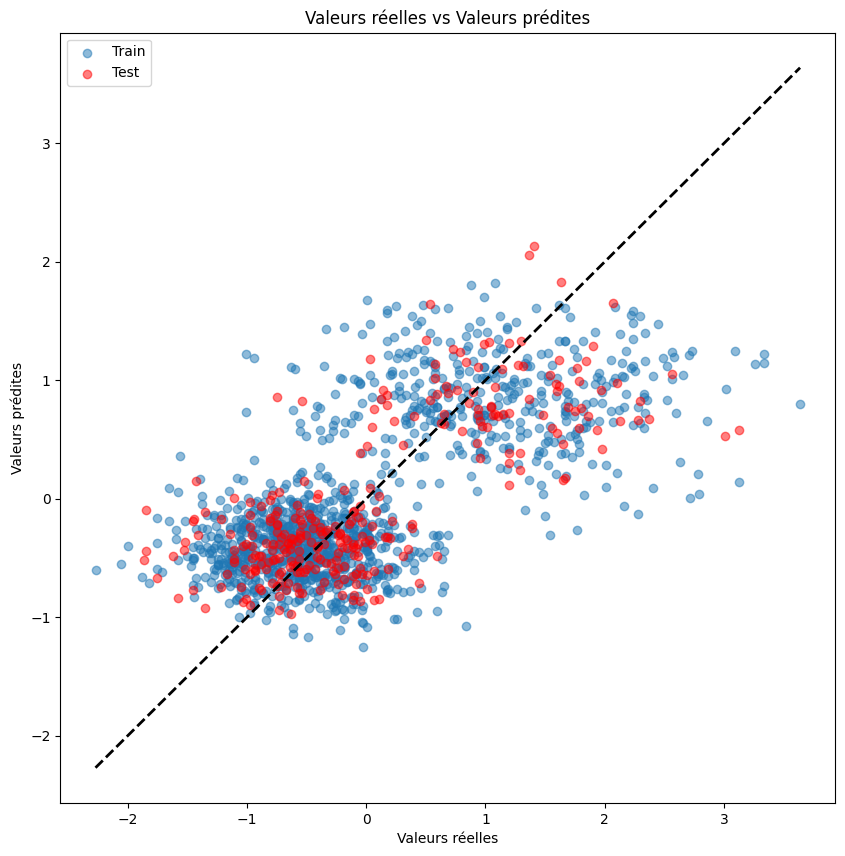

In [137]:
# séparer les données en variables explicatives et variable cible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  entrainer un modèle de régression linéaire
model = LinearRegression()
model.fit(X_train, y_train)

# faire des prédictions
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

# Tracer les valeurs réelles vs les valeurs prédites pour l'ensemble d'entraînement
plt.figure(figsize=(10, 10))
plt.scatter(y_train, y_train_pred, alpha=0.5, label='Train')
plt.scatter(y_test, y_pred, alpha=0.5, label='Test', color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Valeurs réelles vs Valeurs prédites')
plt.legend()
plt.show()

Les valeurs prédites semblent suivre le modèle

In [138]:
Xdf.isna().sum()

diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [139]:
Xdf.iloc[missing_indexes]

,diagonal,height_left,height_right,margin_low,margin_up,length
72,-0.060441,-0.466103,-1.444792,-0.252330,0.425168,0.127803
99,-0.093217,0.135176,0.797784,-0.139092,-0.049510,0.460204
151,0.365659,-0.766742,1.412188,-0.113792,-0.567341,0.288272
197,-1.666506,-1.234404,-0.369585,-0.251592,2.021814,0.677984
241,-0.420986,0.369007,0.429141,0.248122,-0.567341,-0.365069
251,-0.519316,-2.570579,-3.380166,-1.028743,-0.869409,0.620674
284,-0.125994,-0.666529,-0.492466,-0.461479,0.338863,0.700909
334,-0.355432,-1.100786,0.121939,-0.540285,-0.653647,0.781144
410,1.971724,-1.033977,-1.260471,-0.528844,-0.135816,0.311197
413,1.119526,-1.234404,-1.291191,-0.490409,0.036795,0.311197


on vois bien que les lignes contenant des valeurs manquantes on été comblées.

In [140]:
Xdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      1500 non-null   float64
 1   height_left   1500 non-null   float64
 2   height_right  1500 non-null   float64
 3   margin_low    1500 non-null   float64
 4   margin_up     1500 non-null   float64
 5   length        1500 non-null   float64
dtypes: float64(6)
memory usage: 70.4 KB


In [141]:
Xdf.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1.500000e+03,1.500000e+03,1.500000e+03,1500.000000,1.500000e+03,1.500000e+03
mean,-7.850550e-14,4.812743e-14,-2.783433e-14,-0.003755,-9.852859e-16,4.547474e-16
std,1.000334e+00,1.000334e+00,1.000334e+00,0.994041,1.000334e+00,1.000334e+00
min,-3.010357e+00,-2.971432e+00,-3.380166e+00,-2.269439,-3.803785e+00,-3.654697e+00
25%,-6.832007e-01,-6.999333e-01,-6.460667e-01,-0.702196,-6.967992e-01,-7.433186e-01
50%,5.113189e-03,3.496326e-02,-9.420867e-04,-0.265176,-4.951040e-02,3.226587e-01
75%,6.934271e-01,6.696467e-01,7.056229e-01,0.578724,6.840835e-01,7.582193e-01
max,3.446683e+00,2.840932e+00,3.163240e+00,3.637861,3.273239e+00,2.019053e+00


In [142]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sélectionner les colonnes numériques pour le calcul du VIF
numeric_cols = Xdf.select_dtypes(include=['float64']).columns

# Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_cols
vif_data["VIF"] = [variance_inflation_factor(Xdf[numeric_cols].values, i) for i in range(len(numeric_cols))]

print(vif_data)

       Variable       VIF
0      diagonal  1.017905
1   height_left  1.158829
2  height_right  1.260473
3    margin_low  1.937040
4     margin_up  1.419218
5        length  2.142249


### Interprétation du VIF (Variance Inflation Factor)

Le VIF (Variance Inflation Factor) est une mesure utilisée pour détecter la multicolinéarité entre les variables indépendantes dans un modèle de régression. La multicolinéarité se produit lorsque deux ou plusieurs variables indépendantes sont fortement corrélées entre elles, ce qui peut poser des problèmes pour l'estimation des coefficients de régression.

Voici comment interpréter les valeurs du VIF :

- **VIF = 1** : Il n'y a pas de corrélation entre cette variable et les autres variables indépendantes.
- **1 < VIF < 5** : Il y a une corrélation modérée entre cette variable et les autres variables indépendantes, mais cela est généralement acceptable.
- **VIF > 5** : Il y a une forte corrélation entre cette variable et les autres variables indépendantes, ce qui indique une multicolinéarité élevée. Dans ce cas, il peut être nécessaire de supprimer ou de combiner certaines variables.

Voici les résultats du VIF pour les variables de notre dataset :

| Variable      | VIF       |
|---------------|-----------|
| diagonal      | 1.017910  |
| height_left   | 1.159027  |
| height_right  | 1.259494  |
| margin_low    | 1.921081  |
| margin_up     | 1.417581  |
| length        | 2.137719  |

Les valeurs de VIF pour toutes les variables sont inférieures à 5, ce qui indique qu'il n'y a pas de multicolinéarité significative dans notre dataset. Par conséquent, nous pouvons conclure que les variables indépendantes ne sont pas fortement corrélées entre elles et peuvent être utilisées dans notre modèle de régression sans problème.

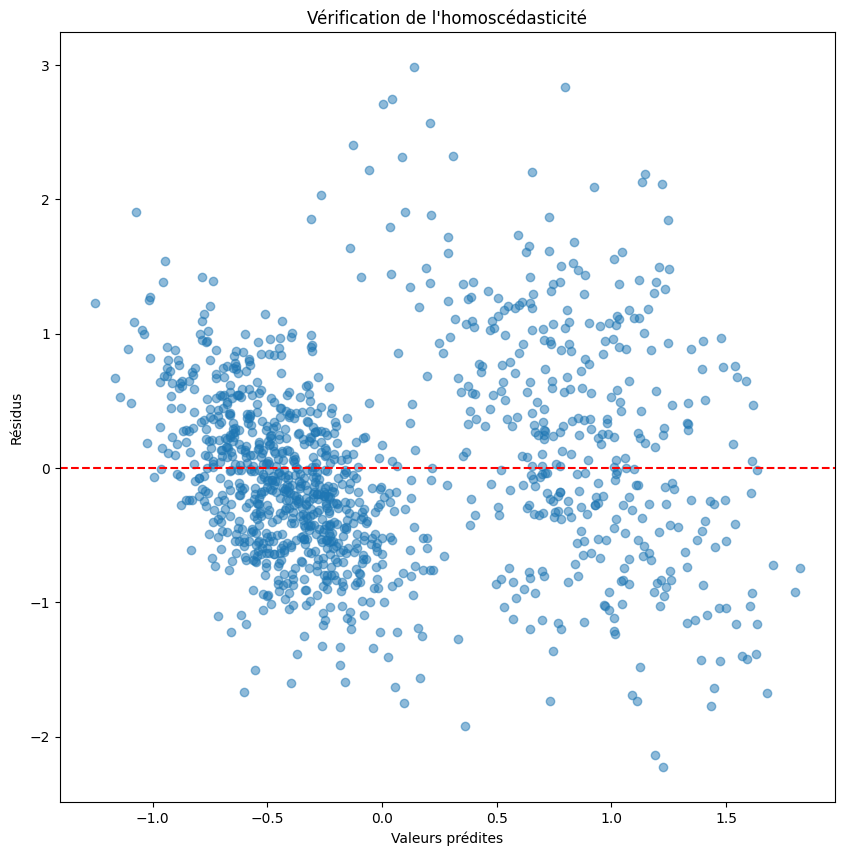

In [143]:
# Faire des prédictions sur l'ensemble d'entraînement
y_train_pred = model.predict(X_train)

# Calculer les résidus pour l'ensemble d'entraînement
residuals_train = y_train - y_train_pred

# Tracer les résidus en fonction des valeurs prédites
plt.figure(figsize=(10, 10))
plt.scatter(y_train_pred, residuals_train, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Vérification de l\'homoscédasticité')
plt.show()

Pas de relation linéaire.

Les résidus sont les différences entre les valeurs observées et les valeurs prédites par une modèle de régression. Ils représentent les erreurs de prédiction du modèle.

Statistique de test: 0.9839137385969299, p-value: 4.3689915023093973e-10


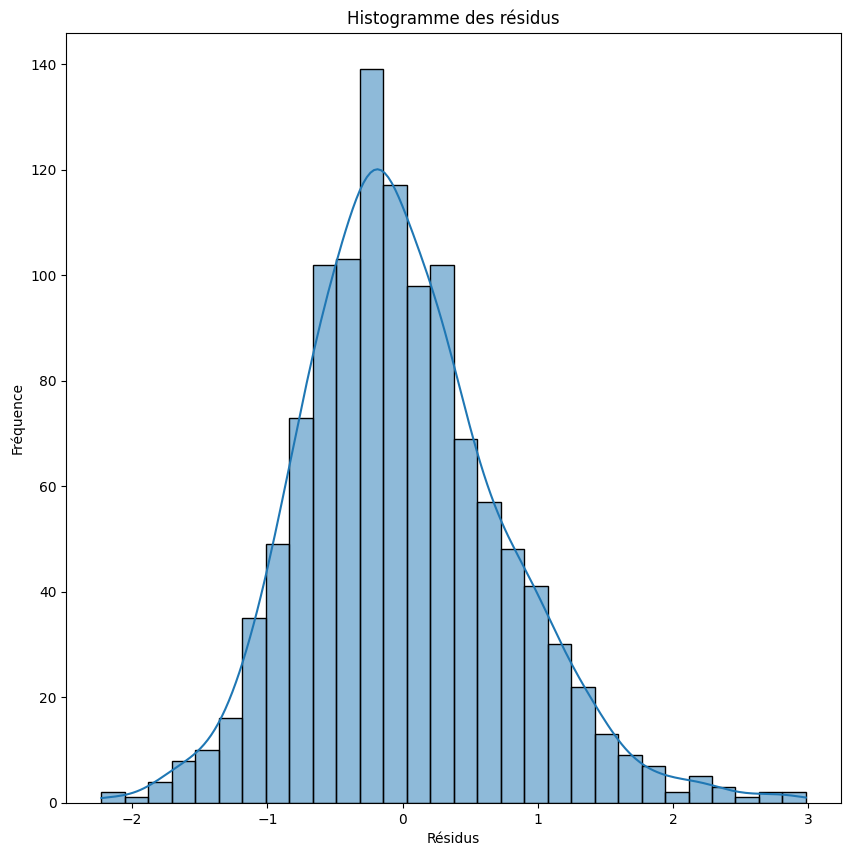

In [144]:
from scipy.stats import shapiro

# Calculer les résidus pour l'ensemble d'entraînement
y_train_pred = model.predict(X_train)
residuals_train = y_train - y_train_pred

# Effectuer le test de Shapiro-Wilk
stat, p_value = shapiro(residuals_train)
print(f'Statistique de test: {stat}, p-value: {p_value}')

# Tracer l'histogramme des résidus
plt.figure(figsize=(10, 10))
sns.histplot(residuals_train, kde=True)
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.title('Histogramme des résidus')
plt.show()

La distribution est proche de la normalité dans le graphique. Il y a assez peut de décalage, on est assez proche de la symétrie.


Pour le test de shapiro-Wilk :
La stat est proche de 1, ce qui indique une distribution normale.
La P-value inférieure à 0.05 indique aussi une forte relation entre les variables.

### Interprétation d'un histogramme des résidus

Un histogramme des résidus est un outil graphique utilisé pour évaluer la qualité d'un modèle de régression. Voici comment interpréter un tel histogramme :

1. **Symétrie** :
    - Un histogramme des résidus devrait idéalement être symétrique autour de zéro. Cela indique que les erreurs de prédiction sont distribuées de manière égale de part et d'autre de la valeur prédite, ce qui suggère que le modèle n'a pas de biais systématique.

2. **Forme de la distribution** :
    - La distribution des résidus devrait ressembler à une distribution normale (courbe en cloche). Cela signifie que la plupart des résidus sont proches de zéro, avec de moins en moins de résidus à mesure que l'on s'éloigne de zéro. Une distribution normale des résidus indique que le modèle est bien ajusté aux données.

3. **Présence de valeurs extrêmes** :
    - Les valeurs extrêmes (ou outliers) dans l'histogramme des résidus peuvent indiquer des points de données qui ne sont pas bien expliqués par le modèle. Ces valeurs peuvent nécessiter une investigation plus approfondie pour comprendre pourquoi elles diffèrent tant des autres observations.

4. **Largeur de la distribution** :
    - Une distribution étroite des résidus indique que les prédictions du modèle sont généralement proches des valeurs réelles, ce qui est souhaitable. Une distribution large, en revanche, suggère que les prédictions du modèle sont souvent éloignées des valeurs réelles, ce qui peut indiquer un modèle moins précis.

En résumé, un bon modèle de régression produira un histogramme des résidus qui est symétrique, en forme de cloche, avec peu ou pas de valeurs extrêmes, et une distribution étroite. Si l'histogramme des résidus ne présente pas ces caractéristiques, cela peut indiquer des problèmes avec le modèle, tels que des biais, une variance élevée, ou des erreurs de spécification du modèle.


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### IV  : ACP et clustering<a id='04'></a>
[retourner au sommaire](#100)

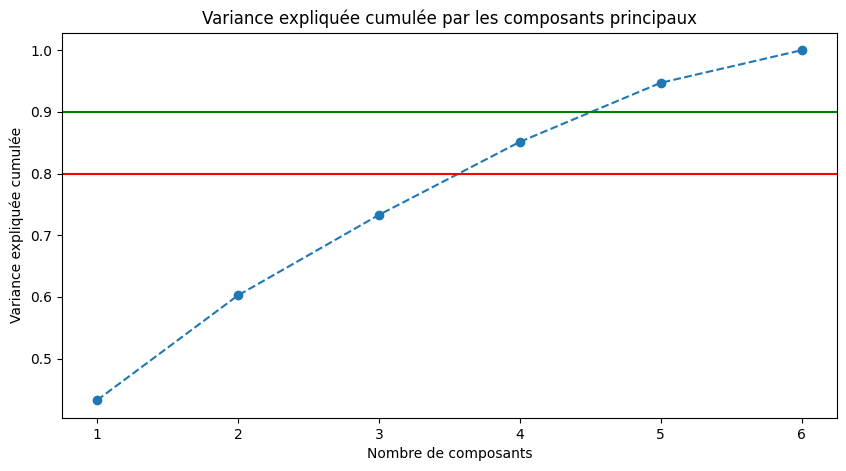

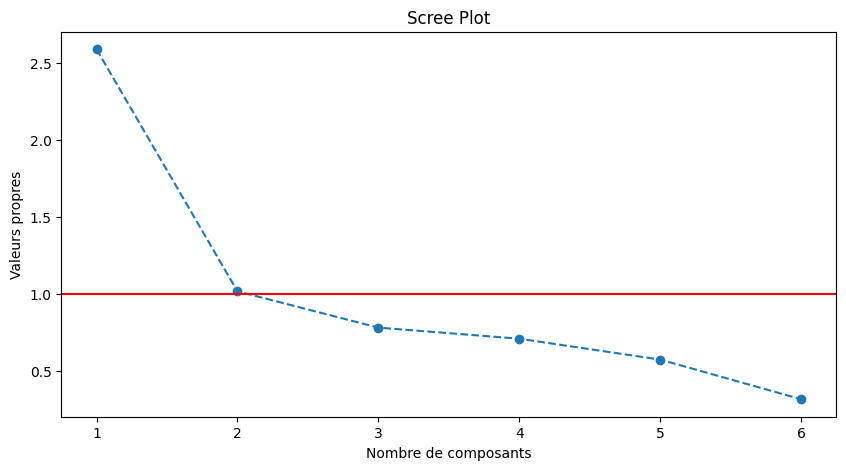

In [145]:
# Application de l'ACP
pca = PCA().fit(Xdf)

# Variance expliquée cumulée
variance_expliquee = np.cumsum(pca.explained_variance_ratio_)

# Plot de la variance expliquée cumulée
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(variance_expliquee) + 1), variance_expliquee, marker='o', linestyle='--')
plt.xlabel('Nombre de composants')
plt.ylabel('Variance expliquée cumulée')
plt.title('Variance expliquée cumulée par les composants principaux')
plt.axhline(y=0.8, color='r', linestyle='-') #80% de variance
plt.axhline(y=0.9, color='g', linestyle='-') #90%  
plt.show()

# Scree plot
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, marker='o', linestyle='--')
plt.xlabel('Nombre de composants')
plt.ylabel('Valeurs propres')
plt.title('Scree Plot')
plt.axhline(y=1, color='r', linestyle='-')
plt.show()

In [146]:
pca = PCA(n_components=2)

# seulement les colonnes numériques
numeric_cols = Xdf.select_dtypes(include=['float64']).columns

# Appliquer PCA sur les colonnes numériques
principal_components = pca.fit_transform(Xdf[numeric_cols])

# Créer un DataFrame avec les composants principaux
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])



df_pca.head()

,PC1,PC2
0,-1.648380,0.745089
1,2.016924,-2.206848
2,0.970658,2.621589
3,1.370568,-1.819535
4,-0.154316,-0.568273


L'objective ici est de réduire les dimention de toutes nos variables quantitatives à deux.
Donc, chaque billet et toute ses mesures pourrat être réduit à deux dimensions.


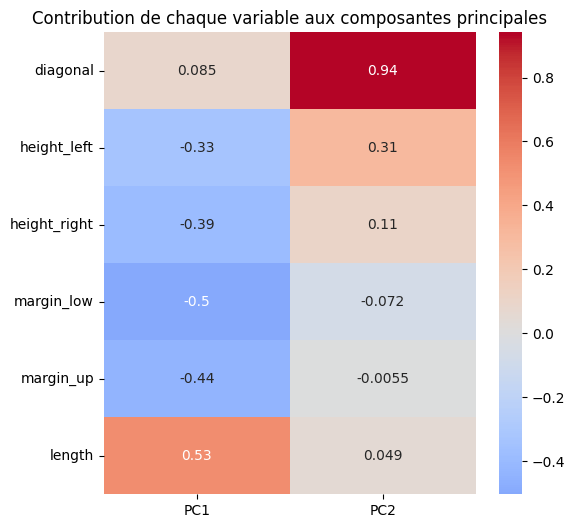

In [147]:
# Obtenir les charges (loadings) des composantes principales
loadings = pca.components_.T

# Créer un DataFrame pour les charges
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=numeric_cols)

# Plot de la heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0)
plt.title('Contribution de chaque variable aux composantes principales')
plt.show()

In [148]:
# Pourcentage de variance expliqué par chaque composante principale
explained_variance_ratio = pca.explained_variance_ratio_

# Affichage des résultats
for i, variance in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {variance * 100:.2f}%")

PC1: 43.24%
PC2: 16.99%


PC1: 43.24% :

La première composante principale (PC1) explique 43.24% de la variance totale des données. Cela signifie que près de la moitié de la variabilité des données peut être capturée par cette seule composante.

PC2: 16.99% :

La deuxième composante principale (PC2) explique 16.99% de la variance totale des données. Cette composante capture une part significative de la variabilité restante après PC1.

In [149]:


# Créer une figure avec des boxplots pour chaque composante principale
fig = px.box(df_pca, y=['PC1', 'PC2'], points="all")

# Afficher la figure
fig.show()

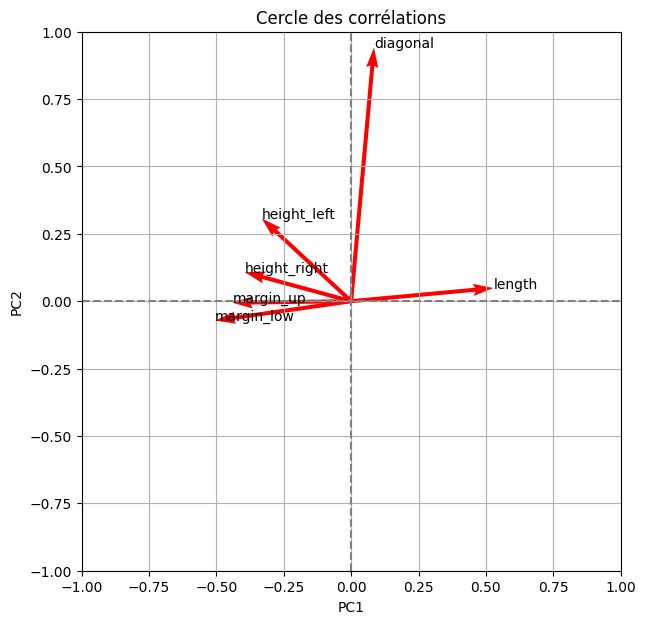

In [150]:
# Cercle des corrélations
plt.figure(figsize=(7, 7))
plt.quiver(np.zeros(loadings.shape[0]), np.zeros(loadings.shape[0]), 
           loadings[:, 0], loadings[:, 1], 
           angles='xy', scale_units='xy', scale=1, color='r')

for i, (x, y) in enumerate(zip(loadings[:, 0], loadings[:, 1])):
    plt.text(x, y, numeric_cols[i], fontsize=10)

plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Cercle des corrélations')
plt.grid()
plt.axhline(0, color='grey', linestyle='--')
plt.axvline(0, color='grey', linestyle='--')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

ON constate que la relation entre les variable à bien été conservé.

### Comment interpréter des cercles de corrélation

Les cercles de corrélation sont des graphiques utilisés en analyse en composantes principales (ACP) pour visualiser les relations entre les variables initiales et les composantes principales. Voici comment les interpréter :

1. **Axes des composantes principales** :
    - Les axes du graphique représentent les composantes principales (par exemple, PC1 et PC2). Chaque point sur le graphique correspond à une variable initiale projetée dans l'espace des composantes principales.

2. **Cercle de corrélation** :
    - Le cercle de corrélation a un rayon de 1. Les variables situées à l'intérieur du cercle sont celles qui sont bien représentées par les composantes principales. Les variables proches du bord du cercle sont mieux représentées que celles proches du centre.

3. **Longueur des vecteurs** :
    - La longueur d'un vecteur (flèche) représente la contribution de la variable à la composante principale. Plus le vecteur est long, plus la variable contribue à la composante principale.

4. **Angle entre les vecteurs** :
    - L'angle entre deux vecteurs indique la corrélation entre les variables correspondantes :
      - Un angle aigu (proche de 0°) indique une forte corrélation positive.
      - Un angle obtus (proche de 180°) indique une forte corrélation négative.
      - Un angle droit (90°) indique une absence de corrélation.

5. **Interprétation des composantes principales** :
    - Les variables qui sont proches les unes des autres sur le graphique sont corrélées et contribuent de manière similaire aux composantes principales.
    - Les variables opposées sur le graphique (angles de 180°) sont négativement corrélées.

6. **Utilisation pratique** :
    - Les cercles de corrélation aident à identifier les variables qui peuvent être regroupées ou réduites, facilitant ainsi l'interprétation des données et la réduction de la dimensionnalité.

En résumé, les cercles de corrélation sont un outil visuel puissant pour comprendre les relations entre les variables initiales et les composantes principales, aidant ainsi à interpréter les résultats de l'ACP.

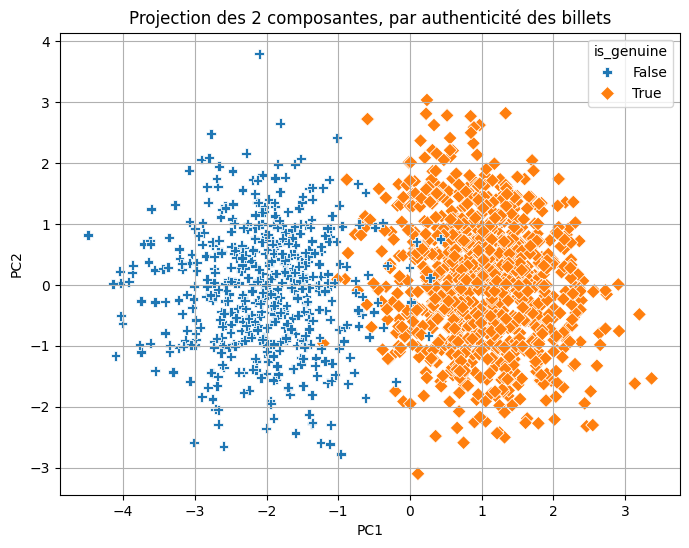

In [151]:
plt.figure(figsize=(8, 6))
scatter_markers = ['P','D']
sns.scatterplot(data=df_pca, x='PC1', y='PC2', style=df['is_genuine'], hue=df['is_genuine'], markers=scatter_markers, s=50)
plt.title('Projection des 2 composantes, par authenticité des billets')
plt.grid()
plt.show()

Les faux et vrais billets sont bien séparés en deux groupes distincts.

In [152]:


# Sélectionner les colonnes numériques pour le clustering
numeric_cols = Xdf.select_dtypes(include=['float64']).columns

# Initialiser le modèle K-means avec un nombre de clusters
kmeans = KMeans(n_clusters=2, random_state=42) #random_state pour la reproductibilité, 42 est une valeur arbitraire mais commune

# Appliquer le modèle K-means sur les colonnes numériques
kmeans.fit(Xdf[numeric_cols])

# Ajouter les labels des clusters au DataFrame
Xdf['cluster'] = kmeans.labels_

# Afficher les premiers résultats
Xdf.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,-0.486540,2.774123,3.163240,0.051286,-1.128325,0.173651,1
1,-1.633729,-2.236535,-0.799668,-1.078937,-0.696799,0.471666,0
2,2.397823,1.504756,-1.291191,-0.129549,-0.912562,0.551901,0
3,-1.961498,-0.399294,0.060498,-1.304982,-0.610494,0.953075,0
4,-0.748754,0.836669,-1.414072,-0.672057,1.417677,-0.158750,0


On fait un clustering en utilisant un K-means

Le K-means est un algorithme de clustering non supervisé utilisé pour partitionner un ensemble de données en K groupes (ou clusters) distincts. Ici 2

In [153]:
# Join df_pca with Xdf
Xdf = pd.concat([Xdf, df_pca], axis=1)

Xdf.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster,PC1,PC2
0,-0.486540,2.774123,3.163240,0.051286,-1.128325,0.173651,1,-1.648380,0.745089
1,-1.633729,-2.236535,-0.799668,-1.078937,-0.696799,0.471666,0,2.016924,-2.206848
2,2.397823,1.504756,-1.291191,-0.129549,-0.912562,0.551901,0,0.970658,2.621589
3,-1.961498,-0.399294,0.060498,-1.304982,-0.610494,0.953075,0,1.370568,-1.819535
4,-0.748754,0.836669,-1.414072,-0.672057,1.417677,-0.158750,0,-0.154316,-0.568273


In [154]:
print("Centres des clusters :")
print(kmeans.cluster_centers_)

# Affichage des labels des clusters
print("Labels des clusters :")
print(kmeans.labels_)

Centres des clusters :
[[ 0.09600039 -0.28194592 -0.35241933 -0.55272579 -0.42692359  0.59324013]
 [-0.19432338  0.57071311  0.71336493  1.10746761  0.86417597 -1.20083284]]
Labels des clusters :
[1 0 0 ... 1 1 1]


### Centres des Clusters
Les centres des clusters (ou centroides) sont des points qui représentent le centre de chaque cluster. Ils sont calculés comme la moyenne des points de données appartenant à ce cluster. En termes simples, le centroïde est le point qui minimise la distance totale à tous les autres points du cluster.

### Labels des Clusters
Les labels des clusters sont des identifiants attribués à chaque point de données pour indiquer à quel cluster il appartient. Par exemple, si vous avez trois clusters, les labels pourraient être 0, 1 et 2. Chaque point de données reçoit un label en fonction du cluster auquel il est le plus proche (ou le plus similaire).

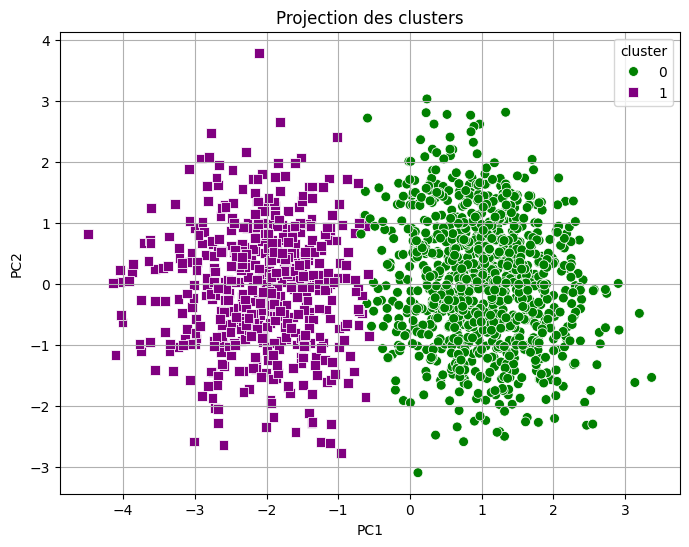

In [155]:
plt.figure(figsize=(8, 6))
scatter_markers = ['o', 's']  # Use only filled markers
sns.scatterplot(data=Xdf, x='PC1', y='PC2', style=Xdf['cluster'], hue=Xdf['cluster'], markers=scatter_markers, s=50, palette=['green', 'purple'])
plt.title('Projection des clusters')
plt.grid()
plt.show()

On constate que les clusters sont extrèmement similaire à la projection des composantes principales par authenticité vu précédement.

In [156]:
# Ajouter la colonne is_genuine à Xdf
Xdf['is_genuine'] = df['is_genuine']

# Afficher les premières lignes pour vérifier
Xdf.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster,PC1,PC2,is_genuine
0,-0.486540,2.774123,3.163240,0.051286,-1.128325,0.173651,1,-1.648380,0.745089,True
1,-1.633729,-2.236535,-0.799668,-1.078937,-0.696799,0.471666,0,2.016924,-2.206848,True
2,2.397823,1.504756,-1.291191,-0.129549,-0.912562,0.551901,0,0.970658,2.621589,True
3,-1.961498,-0.399294,0.060498,-1.304982,-0.610494,0.953075,0,1.370568,-1.819535,True
4,-0.748754,0.836669,-1.414072,-0.672057,1.417677,-0.158750,0,-0.154316,-0.568273,True


on ajoute les pc et clusters à notre dataframe.

In [157]:
# Utiliser crosstab pour compter les occurrences de chaque combinaison de is_genuine et cluster
cluster_counts = pd.crosstab(Xdf['is_genuine'], Xdf['cluster'])

# Afficher les résultats
print(cluster_counts)

cluster       0    1
is_genuine          
False        14  486
True        990   10


on vois les différences entre clusters 0 et 1 et is_genuine True et False
La même chose serais faite ci-dessous avec la matrice de confusion.

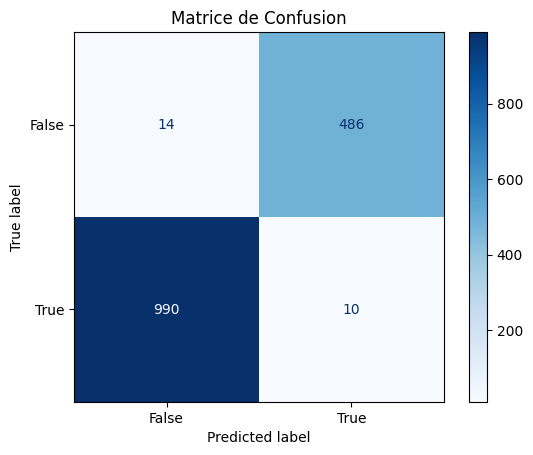

In [158]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #module de matrice de confusion

# Créer la matrice de confusion
cm = confusion_matrix(Xdf['is_genuine'], Xdf['cluster']) #matrice de confusion

# Afficher la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False', 'True']) #affichage de la matrice de confusion
disp.plot(cmap=plt.cm.Blues) #affichage de la matrice de confusion
plt.title('Matrice de Confusion') 
plt.show() 

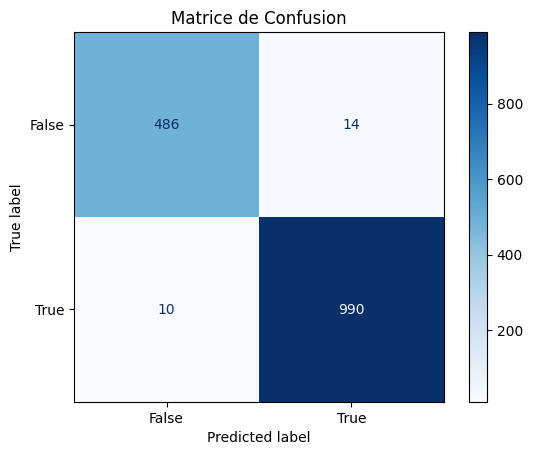

In [159]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Inverser les valeurs de la colonne 'cluster'
Xdf['cluster'] = np.where(Xdf['cluster'] == 0, 1, 0)

# Créer la matrice de confusion
cm = confusion_matrix(Xdf['is_genuine'], Xdf['cluster'])

# Afficher la matrice de confusion avec les étiquettes correctes
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False', 'True'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()

Puis enfin on entraine et évalue un modèle de classification de "forêt aléatoire" pour prédire si un billet est authentique ou non.

La "forêt aléatoire est une méthode d'apprentisage supervisé utilisé pour les tâches de classification. elle repose sur l'agrégation de plusieurs arbres de décision pour améliorer la précision et la robustesse de prédictions.

Accuracy: 0.99


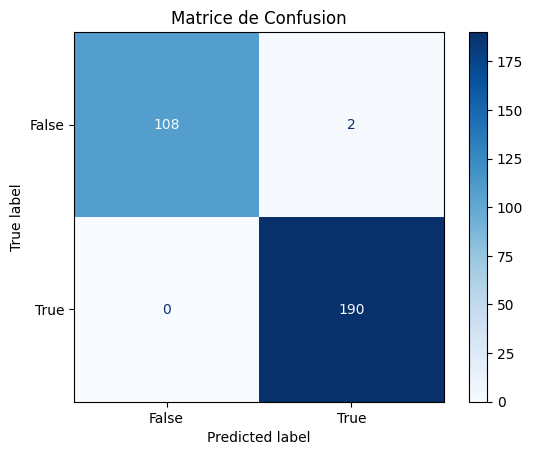

In [160]:
# Séparer les caractéristiques (features) et la cible (target)
X = Xdf.drop(columns=['is_genuine', 'cluster', 'PC1', 'PC2'])
y = Xdf['is_genuine']



# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser le modèle RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Entraîner le modèle
rf_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Afficher la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False', 'True'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Matrice de Confusion')
plt.show()

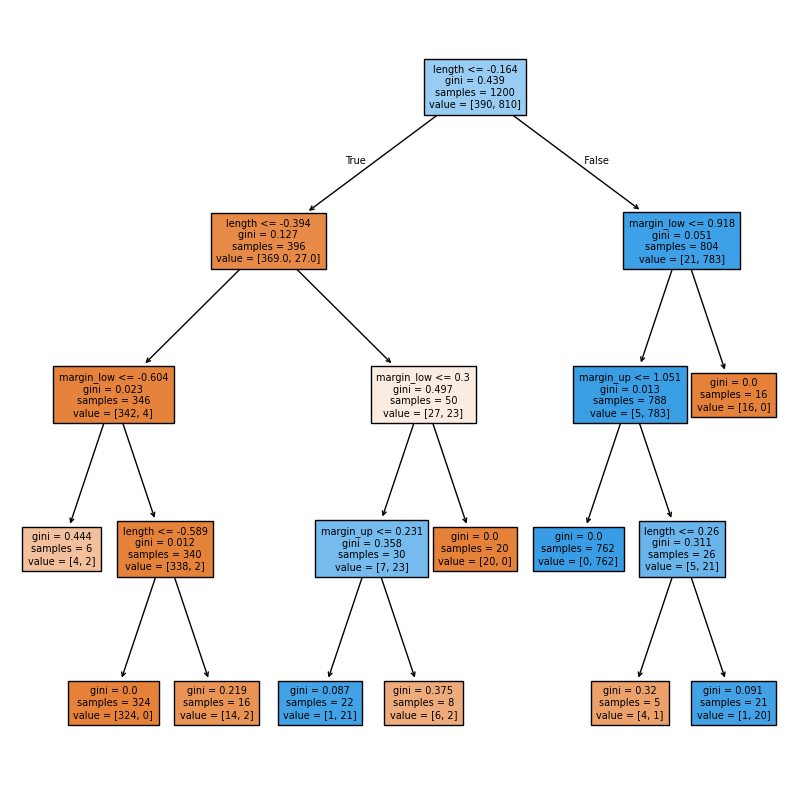

In [174]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Initialiser et entraîner le modèle de l'arbre de décision
clf_tree_gs = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=10)
clf_tree_gs.fit(X_train, y_train)

# Effectuer la prédiction sur les données test
y_pred = clf_tree_gs.predict(X_test)

# Afficher l'arbre de décision
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(clf_tree_gs, feature_names=X.columns, filled=True, fontsize=7, ax=ax)
plt.show()

On put voir ci-dssus l'arbre de décisions.

Une matrice de confusion est un tableau qui permet d'évaluer la performance d'un modèle de classification. Elle compare les prédictions du modèle avec les vraies valeurs pour voir combien de fois le modèle a fait des prédictions correctes ou incorrectes.

Vrai Positif (TP) : Nombre de fois où le modèle a prédit la classe positive correctement.

Vrai Négatif (TN) : Nombre de fois où le modèle a prédit la classe négative correctement.

Faux Positif (FP) : Nombre de fois où le modèle a prédit la classe positive alors que c'était en réalité la classe négative.

Faux Négatif (FN) : Nombre de fois où le modèle a prédit la classe négative alors que c'était en réalité la classe positive.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### V   : Algorithme de détection<a id='05'></a>
[retourner au sommaire](#100)

on va générer un dataframe aléatoire pour faire un essai.

In [162]:
# Générer un dataframe aléatoire
np.random.seed(42)  # Pour la reproductibilité
random_df = pd.DataFrame(np.random.randn(100, 6), columns=['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length'])

random_df.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137
1,1.579213,0.767435,-0.469474,0.542560,-0.463418,-0.465730
2,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247
3,-0.908024,-1.412304,1.465649,-0.225776,0.067528,-1.424748
4,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694


In [163]:

# Standardiser les colonnes du dataframe aléatoire
random_df[columns_to_standardize] = scaler.transform(random_df[columns_to_standardize])



In [164]:
random_df 

,diagonal,height_left,height_right,margin_low,margin_up,length
0,-561.997542,-347.966177,-317.255739,-4.465041,-14.609854,-129.421835
1,-558.449452,-344.940745,-320.687688,-5.942574,-15.599189,-129.687289
2,-562.832538,-353.895510,-324.544437,-7.607540,-17.970050,-128.793270
3,-566.601832,-352.222028,-314.742947,-7.100429,-13.308020,-130.786528
4,-565.409930,-347.133784,-322.781330,-6.194029,-16.191333,-129.487807
...,...,...,...,...,...,...
95,-563.565245,-341.904277,-318.241124,-7.090369,-10.020322,-131.687894
96,-562.853344,-344.929286,-323.787701,-5.036596,-12.138722,-129.629472
97,-561.551555,-339.919203,-318.686755,-6.386133,-15.581683,-130.127566
98,-560.904035,-350.364010,-319.025599,-7.480005,-11.532500,-128.771017


In [165]:
X_train.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 382 to 1126
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      1200 non-null   float64
 1   height_left   1200 non-null   float64
 2   height_right  1200 non-null   float64
 3   margin_low    1200 non-null   float64
 4   margin_up     1200 non-null   float64
 5   length        1200 non-null   float64
dtypes: float64(6)
memory usage: 65.6 KB


In [166]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 1200 entries, 382 to 1126
Series name: is_genuine
Non-Null Count  Dtype
--------------  -----
1200 non-null   bool 
dtypes: bool(1)
memory usage: 10.5 KB


### X_train et y_train

Dans le contexte de l'apprentissage supervisé en machine learning, les données sont généralement divisées en deux ensembles principaux : les données d'entraînement (training set) et les données de test (test set). Voici une explication des deux variables `X_train` et `y_train` :

1. **X_train** :
    - `X_train` représente les caractéristiques (features) des données d'entraînement. Chaque ligne de `X_train` correspond à une observation (ou un exemple) et chaque colonne correspond à une caractéristique (ou une variable) de cette observation.
    - Dans notre cas, `X_train` contient des colonnes telles que `diagonal`, `height_left`, `height_right`, `margin_low`, `margin_up`, et `length`. Ces colonnes représentent différentes mesures des billets en euros.
    - `X_train` est utilisé pour entraîner le modèle de machine learning afin qu'il puisse apprendre les relations entre les caractéristiques des billets et leur authenticité.

2. **y_train** :
    - `y_train` représente la variable cible (target) des données d'entraînement. Chaque valeur de `y_train` correspond à l'étiquette ou la classe de l'observation correspondante dans `X_train`.
    - Dans notre cas, `y_train` contient des valeurs booléennes (`True` ou `False`) indiquant si un billet est authentique (`True`) ou faux (`False`).
    - `y_train` est utilisé par le modèle de machine learning pour apprendre à prédire l'authenticité des billets en fonction des caractéristiques fournies dans `X_train`.

En résumé, `X_train` contient les caractéristiques des billets, tandis que `y_train` contient les étiquettes indiquant si chaque billet est authentique ou non. Ces deux ensembles de données sont utilisés ensemble pour entraîner le modèle de machine learning.

In [167]:
import pickle #pour sauvegarder les données

with open('train_data.pkl', 'wb') as f: #wb pour write binary
    pickle.dump((X_train, y_train), f) #sauvegarde des données d'entraînement

In [168]:
from sklearn.model_selection import cross_val_score

# Initialiser le modèle RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Effectuer une validation croisée avec 5 folds
cv_scores = cross_val_score(rf_model, X, y, cv=5)

# Afficher les scores de validation croisée
print(f'Scores de validation croisée: {cv_scores}')
print(f'Score moyen de validation croisée: {cv_scores.mean():.2f}')

Scores de validation croisée: [0.99       0.98333333 0.99666667 0.99666667 0.99      ]
Score moyen de validation croisée: 0.99


Les scores individuels sont très élévé et le score moyen aussi.

### Validation croisée

La validation croisée est une technique utilisée en apprentissage automatique pour évaluer la performance d'un modèle de manière plus robuste. Elle consiste à diviser les données en plusieurs sous-ensembles (ou "folds") et à entraîner le modèle sur certains de ces sous-ensembles tout en le testant sur les autres. Voici comment cela fonctionne généralement :

1. **Division des données** : Les données sont divisées en K sous-ensembles de taille égale (K-folds).
2. **Entraînement et test** : Le modèle est entraîné K fois, chaque fois en utilisant K-1 sous-ensembles pour l'entraînement et le sous-ensemble restant pour le test.
3. **Calcul des performances** : Les performances du modèle sont calculées pour chaque itération et une moyenne des performances est obtenue.

Cette méthode permet de réduire le risque de surapprentissage (overfitting) et de mieux évaluer la capacité du modèle à généraliser sur des données non vues. Une des variantes les plus courantes est la validation croisée en K-folds, où K est souvent choisi comme 5 ou 10.

Ci-dessous notre algorithme de détection

In [169]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pickle

# Importer les données depuis le fichier pickle
with open('train_data.pkl', 'rb') as f:
    X_train, y_train = pickle.load(f)


def detect_genuine_bills(input_df):
    # colonnes à standardiser
    columns_to_standardize = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']
    
    # Initialiser StandardScaler
    scaler = StandardScaler()
    
    # stadardisation des colonnes
    input_df[columns_to_standardize] = scaler.fit_transform(input_df[columns_to_standardize])
    
    # Define the features and target
    X = input_df[columns_to_standardize]
    
    # Initialiser RandomForestClassifier
    rf_model = RandomForestClassifier(random_state=42)
    
    # entrainer le modèle (avec X_train t y_train)
    rf_model.fit(X_train, y_train)
    
    # faire une prédiction
    predictions = rf_model.predict(X)
    
    # créer un dataframe avec les prédictions
    result_df = input_df.copy()
    result_df['is_genuine'] = predictions
    
    return result_df


result_df = detect_genuine_bills(random_df)
print(result_df.head())

   diagonal  height_left  height_right  margin_low  margin_up    length  \
0  0.422888     0.021218      0.697290    1.661597  -0.091517 -0.346932   
1  1.695475     1.001968     -0.446434    0.600324  -0.305146 -0.573077   
2  0.123401    -1.900885     -1.731727   -0.595577  -0.817093  0.188552   
3 -1.228525    -1.358395      1.534698   -0.231333   0.189592 -1.509535   
4 -0.801028     0.291054     -1.144157    0.419711  -0.433010 -0.403135   

   is_genuine  
0       False  
1       False  
2        True  
3       False  
4       False  


In [170]:
result_df #affichage du dataframe test

,diagonal,height_left,height_right,margin_low,margin_up,length,is_genuine
0,0.422888,0.021218,0.697290,1.661597,-0.091517,-0.346932,False
1,1.695475,1.001968,-0.446434,0.600324,-0.305146,-0.573077,False
2,0.123401,-1.900885,-1.731727,-0.595577,-0.817093,0.188552,True
3,-1.228525,-1.358395,1.534698,-0.231333,0.189592,-1.509535,False
4,-0.801028,0.291054,-1.144157,0.419711,-0.433010,-0.403135,False
...,...,...,...,...,...,...,...
95,-0.139398,1.986296,0.368902,-0.224107,0.899514,-2.277424,False
96,0.115938,1.005683,-1.479539,1.251064,0.442082,-0.523822,False
97,0.582849,2.629795,0.220392,0.281728,-0.301366,-0.948156,False
98,0.815094,-0.756084,0.107470,-0.503972,0.572985,0.207510,True


In [171]:
result_df['is_genuine'].value_counts()

is_genuine
True     56
False    44
Name: count, dtype: int64

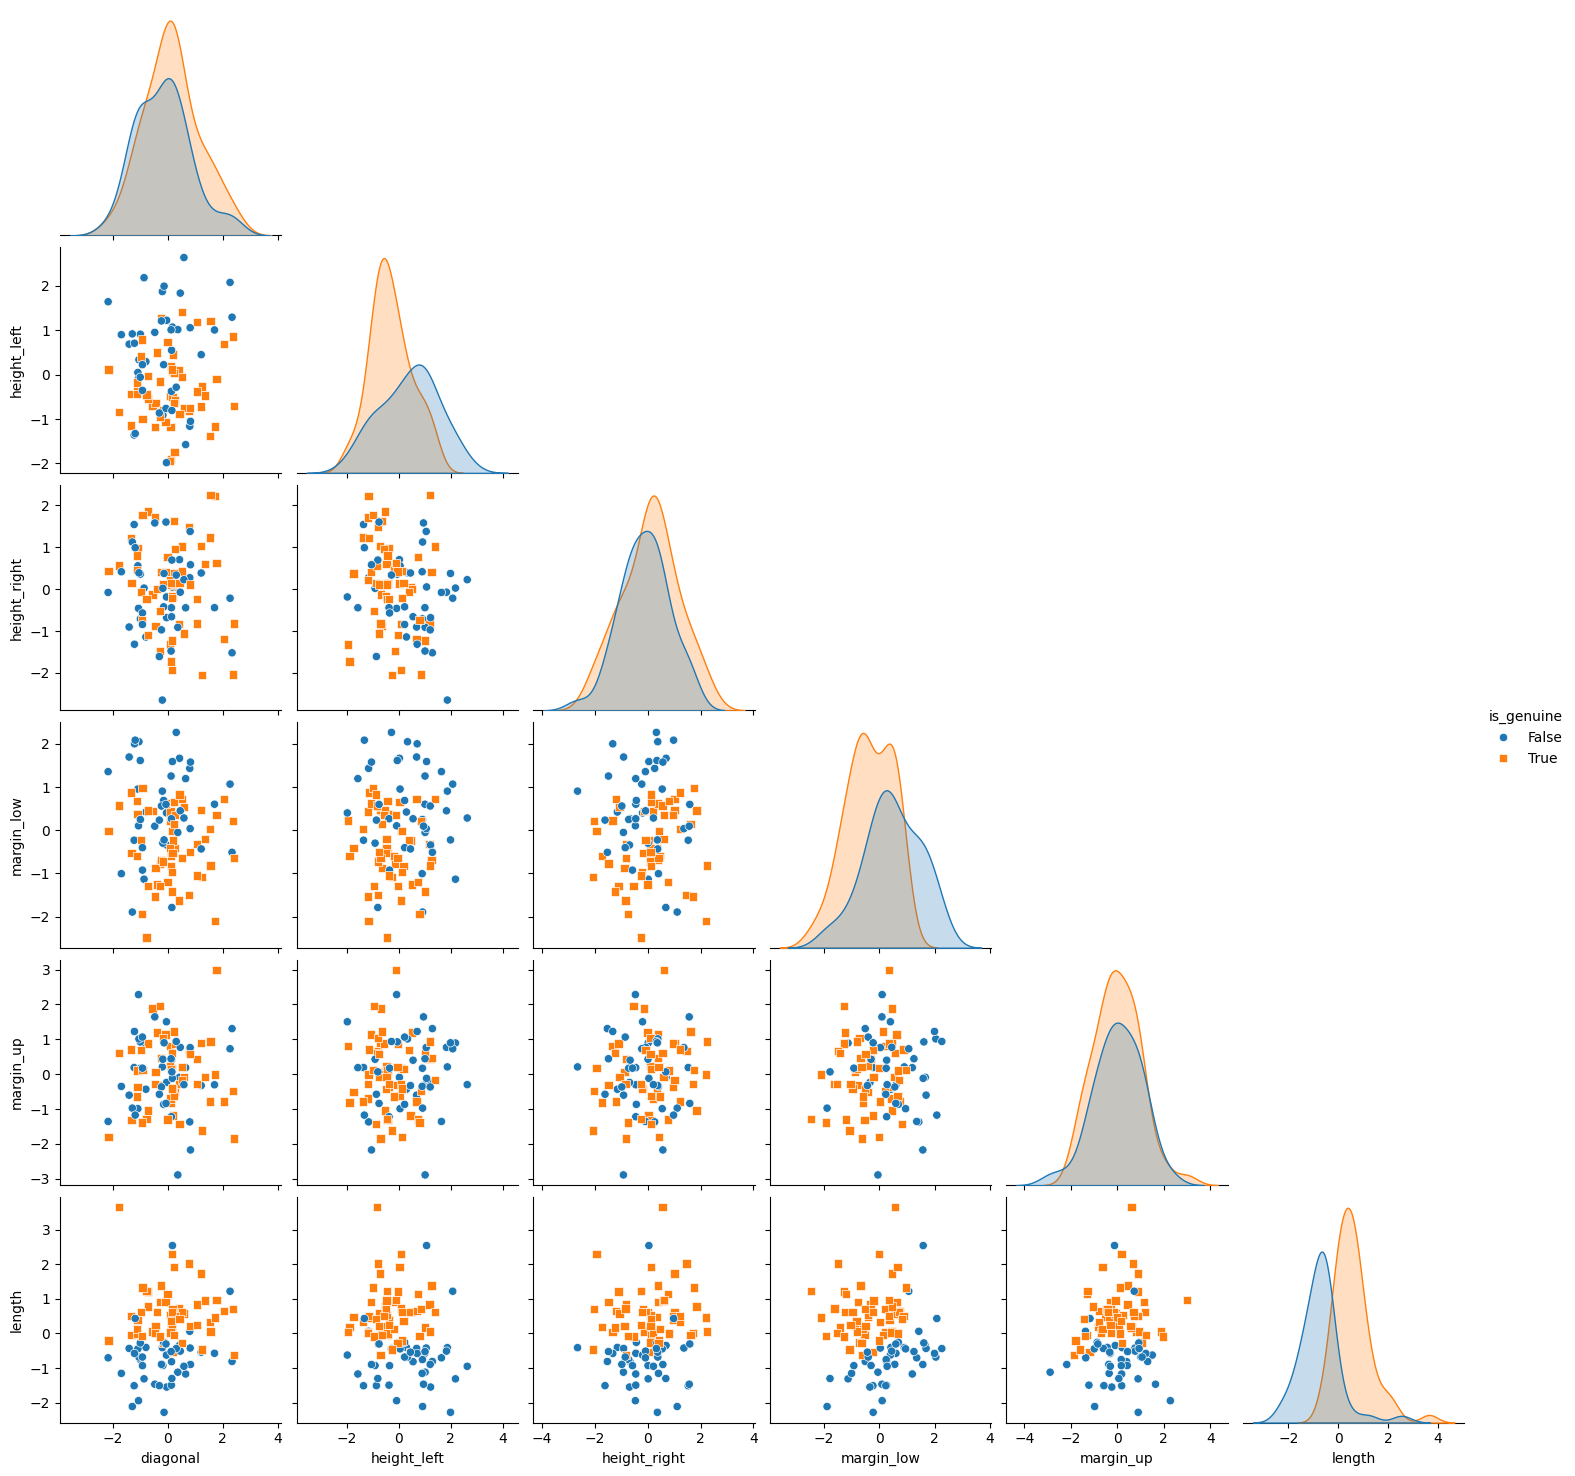

In [172]:
sns.pairplot(result_df, hue='is_genuine', markers=['o', 's'], corner=True)
plt.show()

        PC1       PC2  is_genuine
0 -0.083732 -0.622503       False
1  1.241526  1.094593       False
2 -0.280114  0.721322        True
3 -0.949923 -2.127009       False
4  1.110646 -0.538211       False


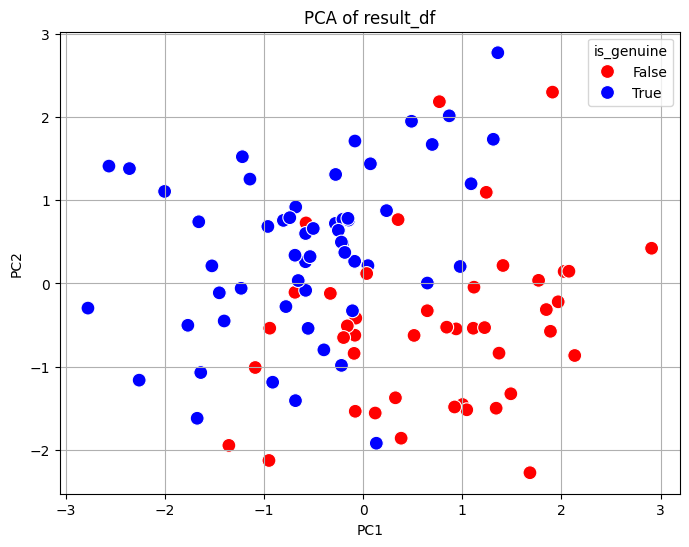

In [173]:
from sklearn.decomposition import PCA

# Sélectionner les colonnes numériques pour la PCA
numeric_cols_result_df = result_df.select_dtypes(include=['float64']).columns

# Initialiser la PCA avec le nombre de composantes souhaité (par exemple, 2)
pca_result_df = PCA(n_components=2)

# Appliquer la PCA sur les colonnes numériques
principal_components_result_df = pca_result_df.fit_transform(result_df[numeric_cols_result_df])

# Créer un DataFrame avec les composantes principales
df_pca_result = pd.DataFrame(data=principal_components_result_df, columns=['PC1', 'PC2'])

# Ajouter la colonne 'is_genuine' pour la visualisation
df_pca_result['is_genuine'] = result_df['is_genuine'].values

# Afficher les premières lignes du DataFrame résultant
print(df_pca_result.head())

# Visualiser les résultats de la PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_result, x='PC1', y='PC2',hue='is_genuine', palette=['red', 'blue'],s=100)
plt.title('PCA of result_df')
plt.grid()
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

On a bien ici un algorithme de détection basé sur un modèle entrainé à partir du fichier fourni.

Il sera légèrement modifié dans le fichié final pour pouvoir recevoir les fichiers à treaiter de façon plus ergonomique.